<a href="https://colab.research.google.com/github/abdullahmazhar51/all-about-python/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series:** Time Series is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis.


**Autoregressive integrated moving avg**
*   Visualize the Time Series Data
*   Make the time series data stationary
*   Plot Correlation and Auto-Co charts
*   Construct the ARIMA or Sarima
*   Use model to make predictions





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the data
df = pd.read_csv('perrin.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
#giving names to column

df.columns=['Month', 'Sales']

In [ ]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
#cleaning data by dropping nan values
df.drop(106, axis = 0, inplace = True)

In [ ]:
df.isnull()

,Month,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
101,False,False
102,False,False
103,False,False
104,False,False


In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.head()


,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
#converting month column into datetime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
#setting month as a index
df.set_index('Month', inplace = True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
## Visualize

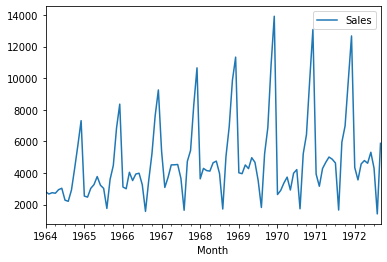

In [ ]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e1082780>]],
      dtype=object)

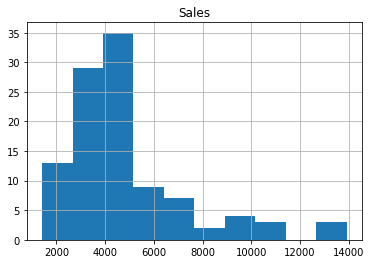

In [ ]:
df.hist()

The above plot shows that data is Seasonal. 
Eg. We buy AC in summer, so graph goes up and then in winter, sales of AC gets lower so graph goes down.

Now we will use SARIMA

**How to Check Stationarity of a Time Series?**

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

*   constant mean
*   constant variance
*   an autocovariance that does not depend on time.

But the best way to check the data is statistical testing using Null Hypothises.

Refer to the link given for the understanding of Null Hypothesis.
[link text](https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php)




### Testing for stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Sales'])

In [ ]:
test_result

(-1.8335930563276193,
 0.36391577166024686,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [ ]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'p-value', '#lag values', ' No of Observation Used']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against null hypothesis")
  else:
    print("data is not stationary. Time series has unit root.")
  

We use critical values only when p values are not given.

We then directly compare critical values with ADF Statistic.

For rejecting Null Hypothesis

Critical value >= ADF Statistic

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#lag values : 11
 No of Observation Used : 93
data is not stationary. Time series has unit root.


If the data is non stationary, 
we can do two things

1.   Differencing




2.   List item

